In [2]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# basic functionalities
import re
import os
import sys
import datetime
import itertools
import math 


# data transforamtion and manipulation
import pandas as pd
import pandas_datareader.data as web
import numpy as np
# prevent crazy long pandas prints
pd.options.display.max_columns = 16
pd.options.display.max_rows = 16
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(precision=5, suppress=True)


# remove warnings
import warnings
warnings.filterwarnings('ignore')


# plotting and plot stying
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.style.use('seaborn')
#sns.set_style("whitegrid", {'axes.grid' : False})
#set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 80
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['text.usetex'] = False
#plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = b"\usepackage{subdepth}, \usepackage{type1cm}"


# statistical modeling libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
#from arch import arch_model


# deep learning
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model 


# jupyter wdgets
from ipywidgets import interactive, widgets, RadioButtons, ToggleButtons, Select, FloatSlider, FloatProgress
from IPython.display import set_matplotlib_formats, Image

Using TensorFlow backend.


# Artificial Neural Networks for Time Series Forecasting

<strong>Artificial neural networks (ANNs)</strong> are computing systems inspired by the biological neural networks that constitute bilological brains. Such systems learn (progressively improve performance) to do tasks by considering examples, generally without task-specific programming (if-then clauses).

An ANN is based on a collection of connected units called <strong>artificial neurons</strong>, (analogous to axons in a biological brain). Each connection (synapse) between neurons can transmit a signal to another neuron. The receiving (postsynaptic) neuron can process the signal(s) and then signal downstream neurons connected to it.

Neurons may have state, generally represented by real numbers, typically between 0 and 1. Neurons and synapses may also have a weight that varies as learning proceeds, which can increase or decrease the strength of the signal that it sends downstream. Further, they may have a threshold such that only if the aggregate signal is below (or above) that level is the downstream signal sent. - <a href="https://en.wikipedia.org/wiki/Artificial_neural_network">Wikipedia</a>


## A Supervised Learning Task

Time series prediction problems are inherently different from supervised learning problems in that obervastions posses a timely ordering and no observeable input. Thus, the time series prediction problem has to be converted into a regression problem.

A supervised learing problem requires data of the form $(y, X)$ where $y$ is the observeable output and $X$ is a matrix of input data which is assumed to cause the observed output. Since the output variable $y$ is assumed to be continuous this problem is called a supervised regression problem.




In [1]:
np.random.seed(7)

NameError: name 'np' is not defined

In [6]:
df = pd.read_csv('./data/passengers.csv', sep=';', parse_dates=True, index_col=0)
data = df.values

# using keras often requires the data type float32
data = data.astype('float32')

# slice the data
train = data[0:120, :]
test = data[120:, :]

print(len(train), len(test))

120 24


The <code>create_data</code> function will be used to transform the time series into a regression problem. The <code>lags</code> argument takes an integer which corresponds the the number of previous time steps to use as input variables to predict the next time period. The default value is one but will be changed in a next iteration.

With the default setting a data set will be created where $X$ is the number of passengers at time $t$ and $y$ is the number of passengers at time 4t+1$.

In [141]:
def prepare_data(data, lags=1):
    """
    Create lagged data from an input time series
    """
    X_data, y_data = [], []
    for row in range(len(data) - lags - 1):
        a = data[row:(row + lags), 0]
        X_data.append(a)
        y_data.append(data[row + lags, 0])
    return np.array(X_data), np.array(y_data)

In [142]:
lags = 1
X_train, y_train = create_data(train, lags)
X_test, y_test = create_data(test, lags)
y_true = y_test     # due to naming convention

In [143]:
#X_data, y_data = create_data(data, lags)

In [144]:
#X_train, X_test = X_data[:120], X_data[120:]
#y_train, y_test = y_data[:120], y_data[120:]

In [145]:
X_train

array([[ 112.],
       [ 118.],
       [ 132.],
       [ 129.],
       [ 121.],
       [ 135.],
       [ 148.],
       [ 148.],
       [ 136.],
       [ 119.],
       [ 104.],
       [ 118.],
       [ 115.],
       [ 126.],
       [ 141.],
       [ 135.],
       [ 125.],
       [ 149.],
       [ 170.],
       [ 170.],
       [ 158.],
       [ 133.],
       [ 114.],
       [ 140.],
       [ 145.],
       [ 150.],
       [ 178.],
       [ 163.],
       [ 172.],
       [ 178.],
       [ 199.],
       [ 199.],
       [ 184.],
       [ 162.],
       [ 146.],
       [ 166.],
       [ 171.],
       [ 180.],
       [ 193.],
       [ 181.],
       [ 183.],
       [ 218.],
       [ 230.],
       [ 242.],
       [ 209.],
       [ 191.],
       [ 172.],
       [ 194.],
       [ 196.],
       [ 196.],
       [ 236.],
       [ 235.],
       [ 229.],
       [ 243.],
       [ 264.],
       [ 272.],
       [ 237.],
       [ 211.],
       [ 180.],
       [ 201.],
       [ 204.],
       [ 188.],
       [

In [146]:
y_train

array([ 118.,  132.,  129.,  121.,  135.,  148.,  148.,  136.,  119.,
        104.,  118.,  115.,  126.,  141.,  135.,  125.,  149.,  170.,
        170.,  158.,  133.,  114.,  140.,  145.,  150.,  178.,  163.,
        172.,  178.,  199.,  199.,  184.,  162.,  146.,  166.,  171.,
        180.,  193.,  181.,  183.,  218.,  230.,  242.,  209.,  191.,
        172.,  194.,  196.,  196.,  236.,  235.,  229.,  243.,  264.,
        272.,  237.,  211.,  180.,  201.,  204.,  188.,  235.,  227.,
        234.,  264.,  302.,  293.,  259.,  229.,  203.,  229.,  242.,
        233.,  267.,  269.,  270.,  315.,  364.,  347.,  312.,  274.,
        237.,  278.,  284.,  277.,  317.,  313.,  318.,  374.,  413.,
        405.,  355.,  306.,  271.], dtype=float32)

The data set now has the following form
<pre>
X       y
112     118
118     132
132     129
129     121
121     135
</pre>
That is, the function has successfully shifted the data for one time step and saved this new shifted series to an array.

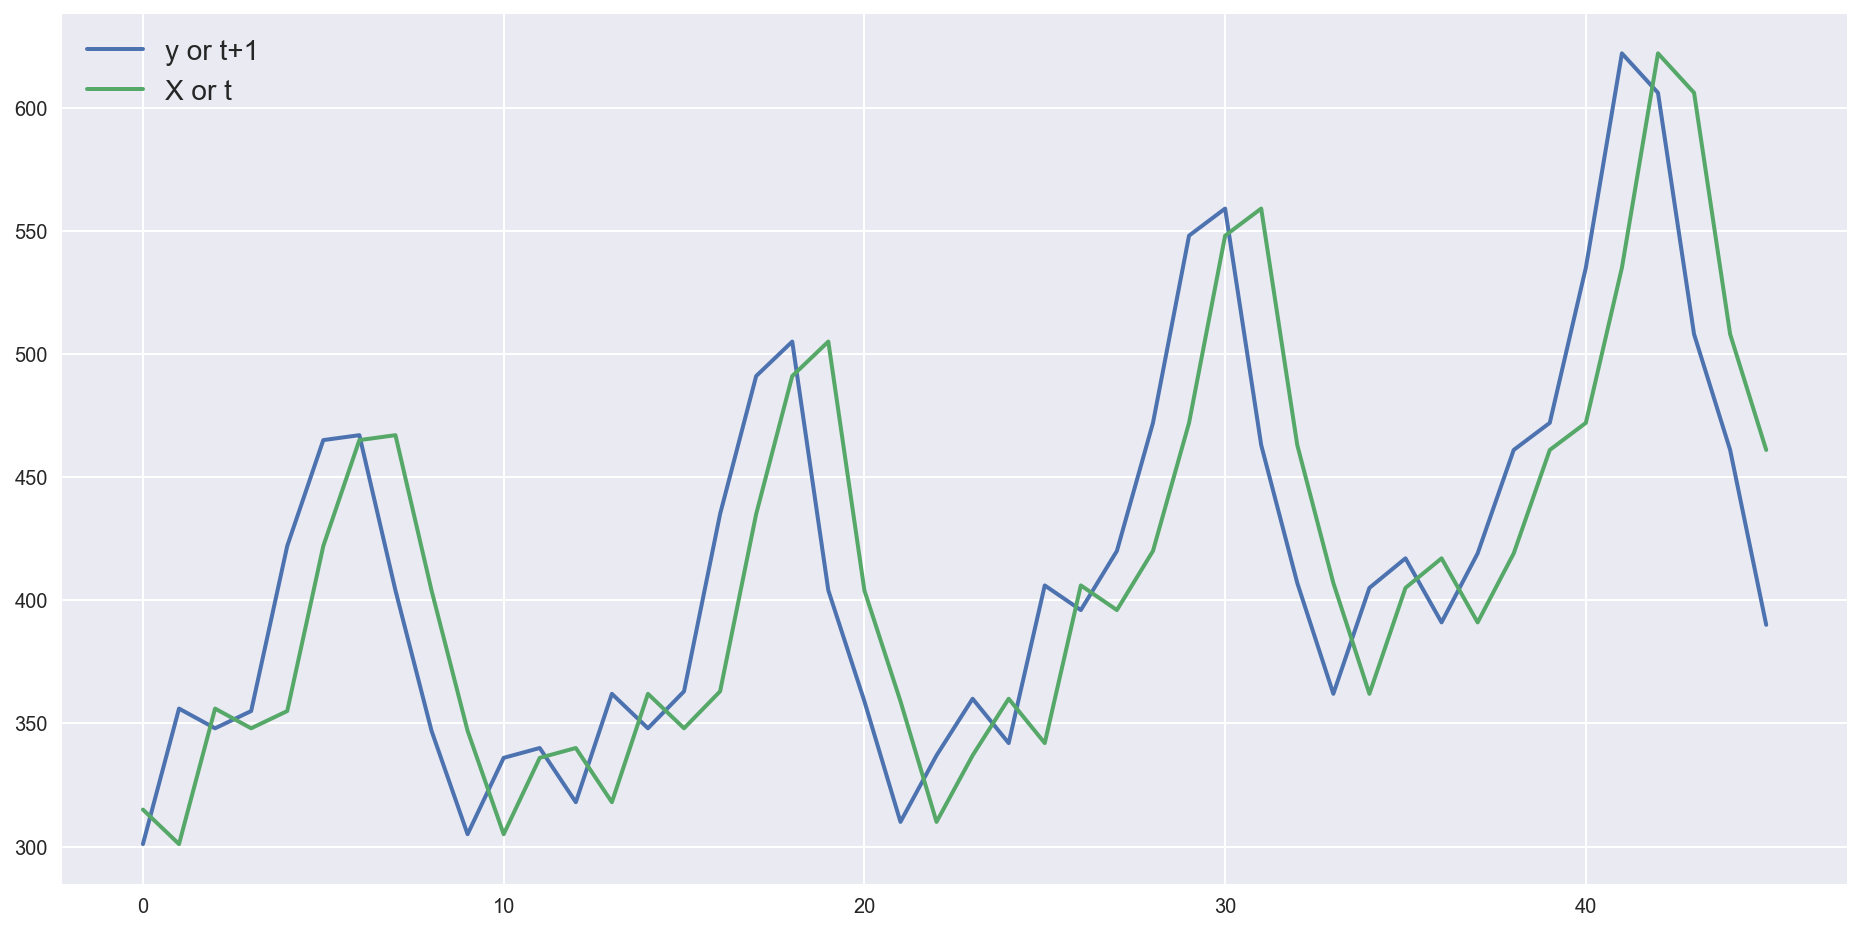

In [148]:
# plot the created data
plt.plot(y_test, label='y or t+1')
plt.plot(X_test, label='X or t')
plt.legend()
plt.show()

## Neural Network basics

The very basic ingredient of any artificial neural network is the artificial neuron, called <strong>Perceptron</strong>. These neurons are connected via <strong>synapses</strong>. Synapses take the input $x_{ij}$ of a preceding neuron and multiply his value with a weight $w_{ij}$ and output, $x_{ij} w_{ij}$ the result to the next subsequent neuron in.

Neuron

The neural network is not capable of deciding the size and depth of a neural network. What a ANN does learn are the models parameters, the weights on the synapses.

Data moves through the network by a method called <strong>forward propagation</strong>, hence, such models are called <strong>feed forward networks</strong>

The weights and inputs are placed in matrices $X$ and $W^{(1)}$

where $Z^{(2)}$ is the calculated activity of the second alyer, that is $Z^{(2)}$ is the sum of weighted inputs from each neuron.

$$
z^{(2)} = X W^{(1)}
$$


The activation function has the form

$$
a(z) = \frac{1}{1 + e^{(-z)}}
$$

$$
a^{(2)} = f(z^{(2)})
$$

What remains to be done is to multiply $a^{(2)}$ by the second layer weights $W^{(2)}$ 

$$
z^{(3)} = a^{(2)} W^{(2)}
$$

and apply another activation function to $z^{(3)}$ to yield the estimate of the test score $\hat{y}$

$$
\hat{y} = f(z^{(3)})
$$

In [5]:
class ANN(object):
    def __init__(self):
        # hyperparameters
        self.inputLayerSize = 2
        self.hiddenLayerSize = 3
        self.outputLayer.Size = 1
        
        # initial weights
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def sigmoid(z, prime=False):
        # apply sigmoid activation function
        # activation is applied elemnt wise and return a result with the same dimension as it is iven
        if prime == False:
            return 1 / (1 + np.exp(-z))
        else:
            return np.exp(-z) / ((1 + np.exp(-z)) ** 2)
        
    def forward_propagation(self, X):
        # prpagate input data through the network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.activation(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.activation(self.z3)
        return yhat
    
    def cost_function(self, X, y, prime=False):
        if prime = False:
            #compute cost for given X, y
            self.yHat = self.forward(X)
            J = 0.5 * sum((y - self.yHat)) ** 2
            return J
        else:
            # compute derivative with respect to W1 and W2
            self.yHat = self.forward(X)
            # hidden layer
            delt3 = np.multiply(-(y - self.Hat), self.sigmoid(self.z3, prime=True))
            dJdW2 = np.dot(self.a2.T, delta3)
            # input layer
            delta2 = np.dot(delta3, self.W2.T) * self.sigmoid(self.z2, prime=True)
            dJdW1 = np.dot(X.T, delta2)
            return dJdW1, dJdW2

Using the <code>ANN</code> class to predict will yiel a bas result, since it has yet to be trained properly. The network is trained using a method called <strong>gradient descent</strong> and <strong>back propagation</strong>. To quantify the extend of how much the prediction missed the actual value a <strong>loss function</strong> is needed. A common loss function is the sum of squared errors

$$
J = \sum_{i=1}^n\frac{1}{2} e^2 = \sum_{i=1}^n\frac{1}{2}\left(y - \hat{y}\right)^2
$$

The smaller the loss on the data, the better the estimate, hence this corresponds to a minimizing the loss function (training the network). Remember that $\hat{y}$ is ultimately a function of all model data inputs and all model synapses weights. The only way to minimize the loss is by finding the optimal values for all included weights. By substituting $\hat{y}$ with all above functions

$$
J =  \sum_{i=1}^n \frac{1}{2} \left( y - f(f(XW^{(1)}) W^{(2)}) \right)^2
$$

The contribution of the weighted inputs to the total error are found by the partial derivatives of the loss function with respect to the weights, the <strong>gradient</strong>. This method is called <strong>gradient descent</strong>. More specifically <strong>batch gradient descent</strong> will be applied here, as the all model weights are updated simultaneously

However, if the cost function is non-convex, the gradient descent algorithm migth get stuck in local minima instead of the desired global minimum. For that matter, the sum of squared errors is chosen as the loss function as this is a convex function.

The total error then needs to be propagated back through the system in accordance to the contribution of each preceding connected neuron.

The $W$ is multiplied by the <strong>learning rate</strong> $\nu$


## Multilayer Perceptron Network

As previously, the data is sliced up into a <code>train</code> and <code>test</code> set to evaluate the performance of a two-year-ahead forecast.


The first simple entwork will have one input (size of the <code>look_bacl</code> variable), one hidden layer with 8 neurons and an output layer. The model is fitted using the MSE criterion and rectified linear units as activation function

In [90]:
# create and fit Multilayer Perceptron model
mdl = Sequential()
mdl.add(Dense(8, input_dim=lags, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
0s - loss: 38637.6882
Epoch 2/200
0s - loss: 22428.6020
Epoch 3/200
0s - loss: 12099.7258
Epoch 4/200
0s - loss: 6027.9298
Epoch 5/200
0s - loss: 2988.9780
Epoch 6/200
0s - loss: 1688.0802
Epoch 7/200
0s - loss: 1129.5917
Epoch 8/200
0s - loss: 920.5529
Epoch 9/200
0s - loss: 848.7596
Epoch 10/200
0s - loss: 831.5936
Epoch 11/200
0s - loss: 835.2532
Epoch 12/200
0s - loss: 828.5263
Epoch 13/200
0s - loss: 832.7316
Epoch 14/200
0s - loss: 834.7539
Epoch 15/200
0s - loss: 833.4577
Epoch 16/200
0s - loss: 829.5685
Epoch 17/200
0s - loss: 828.0323
Epoch 18/200
0s - loss: 832.2428
Epoch 19/200
0s - loss: 834.3289
Epoch 20/200
0s - loss: 830.4947
Epoch 21/200
0s - loss: 827.4780
Epoch 22/200
0s - loss: 831.8091
Epoch 23/200
0s - loss: 838.3291
Epoch 24/200
0s - loss: 839.6120
Epoch 25/200
0s - loss: 832.4097
Epoch 26/200
0s - loss: 830.7346
Epoch 27/200
0s - loss: 841.8412
Epoch 28/200
0s - loss: 839.0494
Epoch 29/200
0s - loss: 833.7260
Epoch 30/200
0s - loss: 829.1571
Epoch 31/

In [91]:
# estimate model performance
train_score = mdl.evaluate(X_train, y_train, verbose=0)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))

Train Score: 817.47 MSE (28.59 RMSE)
Test Score: 2803.47 MSE (52.95 RMSE)


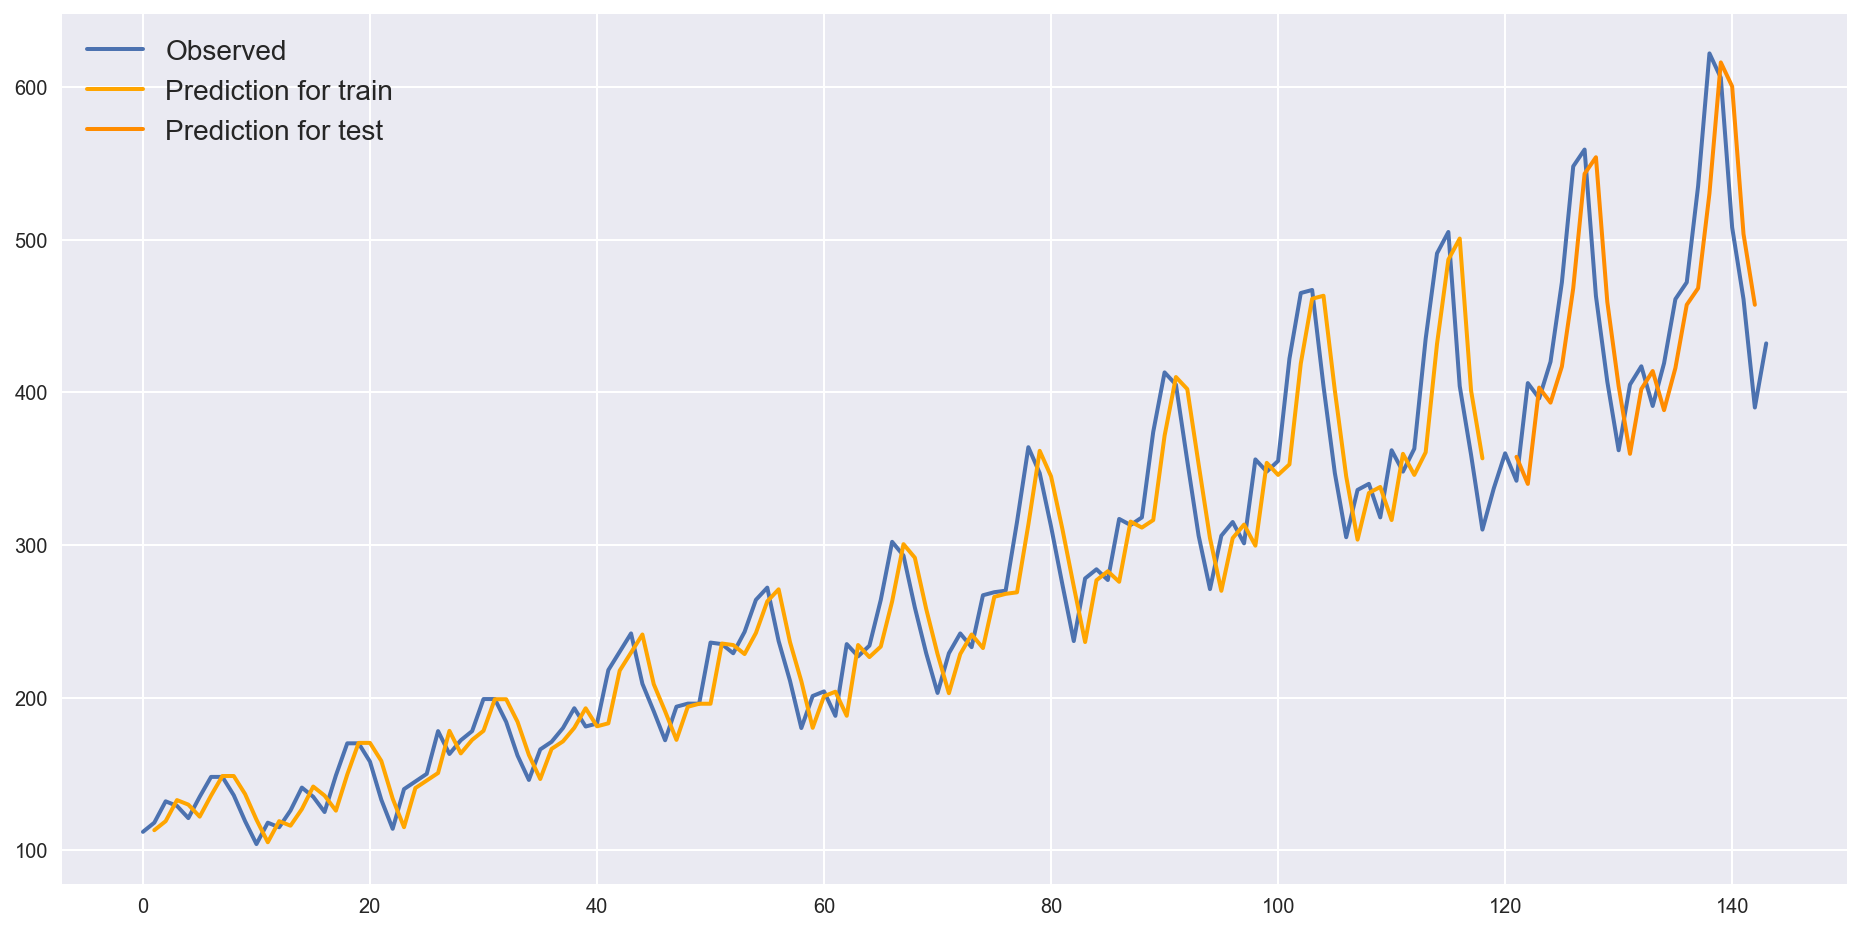

In [93]:
# generate predictions for training
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)

# shift train predictions for plotting
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags: len(train_predict) + lags, :] = train_predict

# shift test predictions for plotting
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(lags*2)+1:len(data)-1, :] = test_predict

# plot baseline and predictions
plt.plot(data, label='Observed');
plt.plot(train_predict_plot, label='Prediction for train', color='orange');
plt.plot(test_predict_plot, label='Prediction for test', color='darkorange');
plt.legend(loc='best');
plt.show()

In [94]:
y_test

array([ 342.,  406.,  396.,  420.,  472.,  548.,  559.,  463.,  407.,
        362.,  405.,  417.,  391.,  419.,  461.,  472.,  535.,  622.,
        606.,  508.,  461.,  390.], dtype=float32)

In [95]:
test_predict

array([[ 357.68179],
       [ 339.92819],
       [ 403.05215],
       [ 393.18903],
       [ 416.86053],
       [ 468.14871],
       [ 543.1084 ],
       [ 553.95776],
       [ 459.27194],
       [ 404.03845],
       [ 359.65445],
       [ 402.06583],
       [ 413.90155],
       [ 388.25751],
       [ 415.87418],
       [ 457.29929],
       [ 468.14871],
       [ 530.28632],
       [ 616.09546],
       [ 600.31445],
       [ 503.65598],
       [ 457.29929]], dtype=float32)

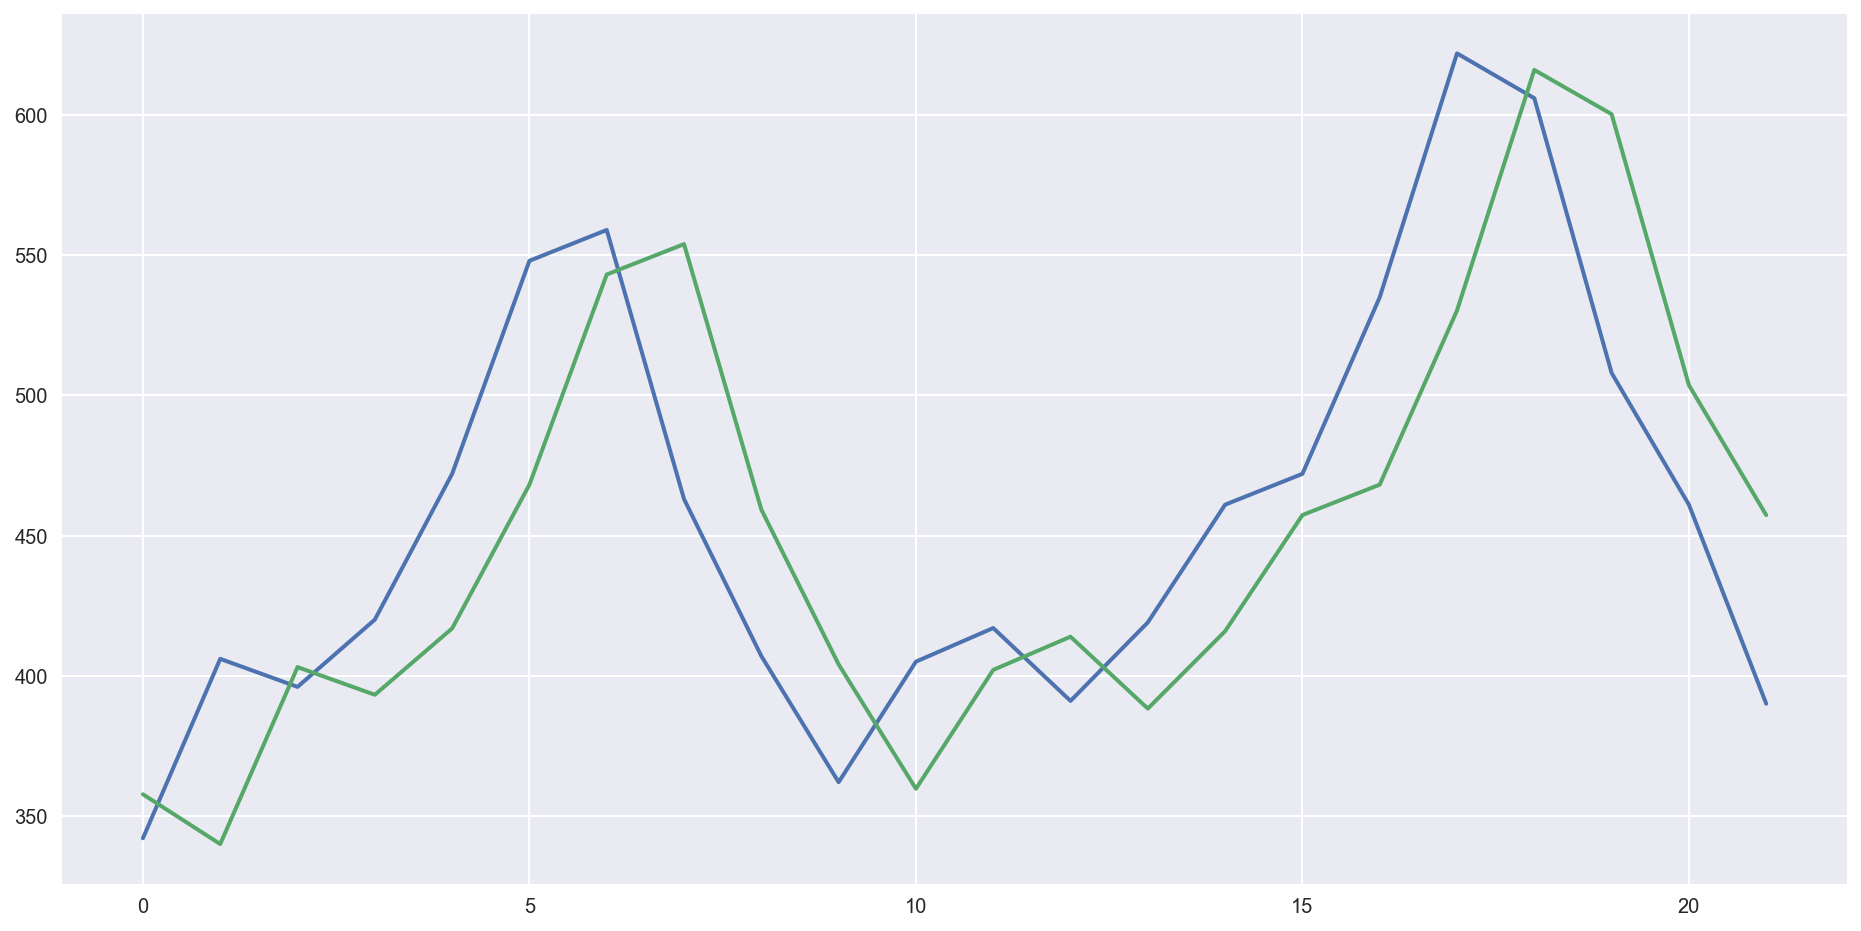

In [96]:
plt.plot(y_test)
plt.plot(test_predict)
plt.show()

In [97]:
mse = ((y_test - test_predict) ** 2).mean()
print(mse)
print(math.sqrt(mse))

11392.1
106.7337471160715


Since the neural network has only been fed by the last observation, it did not have much choice but to learn to apply observation $t$ for the prediction of $t+1$.

## Multilayer perceptron with window

In [98]:
# reshape dataset
lags = 3
X_train, y_train = create_data(train, lags)
X_test, y_test = create_data(test, lags)

In [99]:
len(y_train)

116

In [100]:
# create and fit Multilayer Perceptron model
mdl = Sequential()
mdl.add(Dense(12, input_dim=lags, activation='relu'))
mdl.add(Dense(8, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=400, batch_size=2, verbose=2)

Epoch 1/400
0s - loss: 59920.6984
Epoch 2/400
0s - loss: 17149.6547
Epoch 3/400
0s - loss: 2112.1637
Epoch 4/400
0s - loss: 1367.2453
Epoch 5/400
0s - loss: 1320.0948
Epoch 6/400
0s - loss: 1319.5368
Epoch 7/400
0s - loss: 1292.8918
Epoch 8/400
0s - loss: 1305.2387
Epoch 9/400
0s - loss: 1281.5572
Epoch 10/400
0s - loss: 1287.5422
Epoch 11/400
0s - loss: 1307.7737
Epoch 12/400
0s - loss: 1329.8361
Epoch 13/400
0s - loss: 1320.6188
Epoch 14/400
0s - loss: 1304.3458
Epoch 15/400
0s - loss: 1261.7063
Epoch 16/400
0s - loss: 1324.7150
Epoch 17/400
0s - loss: 1287.3161
Epoch 18/400
0s - loss: 1253.2253
Epoch 19/400
0s - loss: 1282.6782
Epoch 20/400
0s - loss: 1264.0784
Epoch 21/400
0s - loss: 1299.7397
Epoch 22/400
0s - loss: 1231.1341
Epoch 23/400
0s - loss: 1238.5876
Epoch 24/400
0s - loss: 1240.7071
Epoch 25/400
0s - loss: 1272.8569
Epoch 26/400
0s - loss: 1265.1149
Epoch 27/400
0s - loss: 1219.8771
Epoch 28/400
0s - loss: 1235.2360
Epoch 29/400
0s - loss: 1208.8051
Epoch 30/400
0s - los

0s - loss: 754.4304
Epoch 243/400
0s - loss: 775.4818
Epoch 244/400
0s - loss: 769.9656
Epoch 245/400
0s - loss: 825.0357
Epoch 246/400
0s - loss: 819.4557
Epoch 247/400
0s - loss: 863.7984
Epoch 248/400
0s - loss: 788.2604
Epoch 249/400
0s - loss: 801.7440
Epoch 250/400
0s - loss: 775.1091
Epoch 251/400
0s - loss: 780.3252
Epoch 252/400
0s - loss: 753.2049
Epoch 253/400
0s - loss: 775.2934
Epoch 254/400
0s - loss: 762.6308
Epoch 255/400
0s - loss: 790.5033
Epoch 256/400
0s - loss: 764.4483
Epoch 257/400
0s - loss: 792.2217
Epoch 258/400
0s - loss: 761.6100
Epoch 259/400
0s - loss: 804.4866
Epoch 260/400
0s - loss: 770.6667
Epoch 261/400
0s - loss: 774.4809
Epoch 262/400
0s - loss: 738.6383
Epoch 263/400
0s - loss: 816.2465
Epoch 264/400
0s - loss: 751.3350
Epoch 265/400
0s - loss: 757.7360
Epoch 266/400
0s - loss: 776.7482
Epoch 267/400
0s - loss: 779.2091
Epoch 268/400
0s - loss: 761.8885
Epoch 269/400
0s - loss: 763.6217
Epoch 270/400
0s - loss: 825.0592
Epoch 271/400
0s - loss: 787

In [101]:
# Estimate model performance
train_score = mdl.evaluate(X_train, y_train, verbose=0)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))

Train Score: 741.65 MSE (27.23 RMSE)
Test Score: 2254.48 MSE (47.48 RMSE)


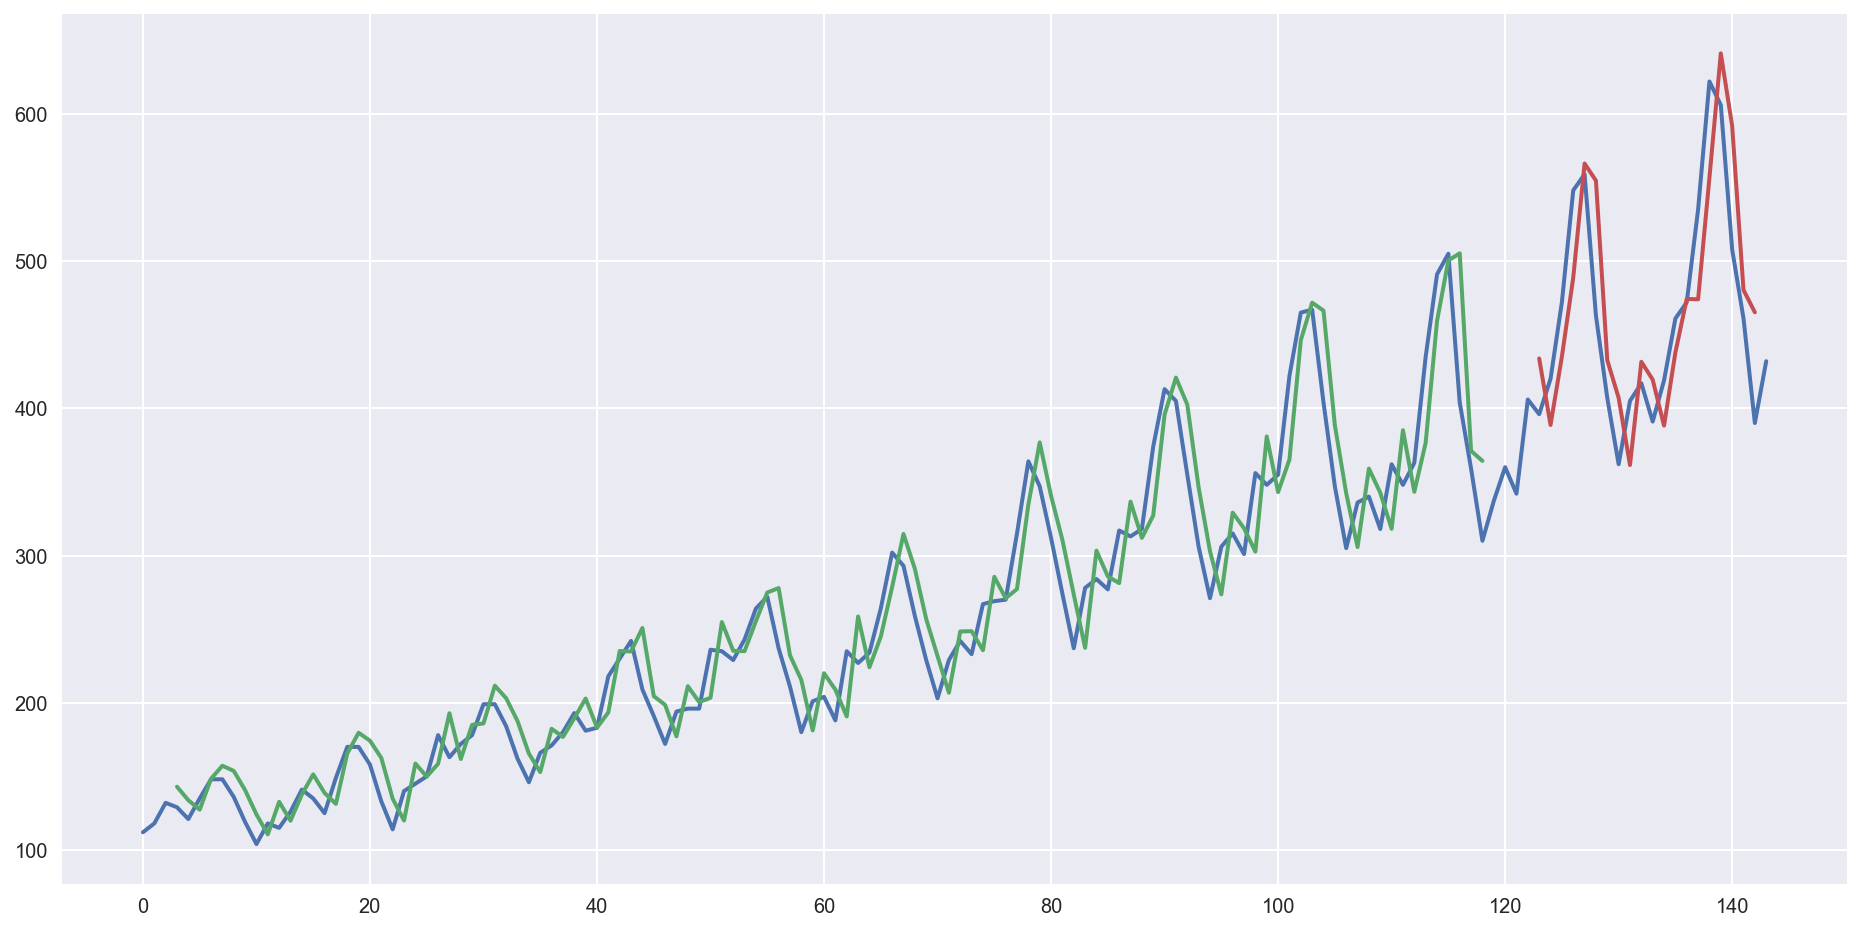

In [103]:
# generate predictions for training
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)

# shift train predictions for plotting
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags: len(train_predict) + lags, :] = train_predict

# shift test predictions for plotting
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(lags * 2)+1:len(data)-1, :] = test_predict

# plot baseline and predictions
plt.plot(data);
plt.plot(train_predict_plot);
plt.plot(test_predict_plot);
plt.show()

In [107]:
mse = ((y_test - test_predict) ** 2).mean()
print(mse)
print(math.sqrt(mse))

10713.1
103.50432131679334


In [108]:
y_test

array([ 396.,  420.,  472.,  548.,  559.,  463.,  407.,  362.,  405.,
        417.,  391.,  419.,  461.,  472.,  535.,  622.,  606.,  508.,
        461.,  390.], dtype=float32)

In [110]:
test_predict

array([[ 433.84158],
       [ 388.66971],
       [ 435.05212],
       [ 488.77972],
       [ 566.29224],
       [ 554.65643],
       [ 432.6485 ],
       [ 407.1037 ],
       [ 361.47409],
       [ 431.60486],
       [ 419.44196],
       [ 388.22321],
       [ 437.97601],
       [ 474.31128],
       [ 474.04037],
       [ 556.82178],
       [ 641.09631],
       [ 591.84857],
       [ 480.36548],
       [ 465.21008]], dtype=float32)

# A Different approach

Change prespective to the monthly percentage changes in airline passengers

In [40]:
data = pd.read_csv('./data/passengers.csv', sep=';', header=0, parse_dates=True, index_col=0)

In [41]:
# compute monthly percentage chagnes
data['changes'] = np.log(data / data.shift(1))

In [42]:
data.head()

,n_passengers,changes
month,,
1949-01-01,112,nan
1949-02-01,118,0.05219
1949-03-01,132,0.11212
1949-04-01,129,-0.02299
1949-05-01,121,-0.06402


In [43]:
def create_data_set(data, lags=1):
    """
    For given df transform into lagged dataset
    """
    cols = []
    for lag in range(1, lags+1):
        col = 'lag_%d' % lag
        data[col] = data['changes'].shift(lag)
        cols.append(col)
        
    return data, cols

In [44]:
# define lags
lags=3

# create new data
data, cols = create_data_set(data, lags=lags)

In [45]:
data.head(10)

,n_passengers,changes,lag_1,lag_2,lag_3
month,,,,,
1949-01-01,112,nan,nan,nan,nan
1949-02-01,118,0.05219,nan,nan,nan
1949-03-01,132,0.11212,0.05219,nan,nan
1949-04-01,129,-0.02299,0.11212,0.05219,nan
1949-05-01,121,-0.06402,-0.02299,0.11212,0.05219
1949-06-01,135,0.10948,-0.06402,-0.02299,0.11212
1949-07-01,148,0.09194,0.10948,-0.06402,-0.02299
1949-08-01,148,0.00000,0.09194,0.10948,-0.06402
1949-09-01,136,-0.08456,0.00000,0.09194,0.10948


In [46]:
data.dropna(inplace=True)

In [47]:
data.head()

,n_passengers,changes,lag_1,lag_2,lag_3
month,,,,,
1949-05-01,121,-0.06402,-0.02299,0.11212,0.05219
1949-06-01,135,0.10948,-0.06402,-0.02299,0.11212
1949-07-01,148,0.09194,0.10948,-0.06402,-0.02299
1949-08-01,148,0.00000,0.09194,0.10948,-0.06402
1949-09-01,136,-0.08456,0.00000,0.09194,0.10948


## OLS Regression

The the most known supervised learning alogorithm is <strong>ordinary least squares (OLS) regression</strong> method. OLS aims to  minimizing the sum of the squares of the differences between the observed responses (values of the variable being predicted) in the given dataset and those predicted by a linear function of a set of explanatory variables. - <a href="https://en.wikipedia.org/wiki/Ordinary_least_squares">Wikipedia</a>

The linear regression model

$$
y_i = \beta_1 + x_{i1} + \dots + \beta_p x_{ip} + \varepsilon_i
$$

can be vectorized

$$
y_i =  x_{i}^T \beta  + \varepsilon_i
$$

rearranged for the error

$$
\varepsilon_i = y_i -  x_{i}^T \beta
$$

squared

$$
\varepsilon_i^2 = \left( y_i -  x_{i}^T \beta \right)^2
$$

and summed over all $i = 1, \dots, n$

$$
\sum_{i=1}^n \varepsilon_i^2 = \sum_{i=1}^n \left( y_i -  x_{i}^T \beta \right)^2
$$

OLS regression can be performed using the <code>numpy</code> module

In [58]:
# return linear least-squares solution to linear matrix equation
# [0] - least square solution (betas)
# [1] = residuals
reg = np.linalg.lstsq(data[cols].values, np.sign(data['changes'].values))[0]

# display the beta coefficients
reg

In [60]:
# compute prediction
pred = np.sign(np.dot(data[cols].values, reg))

pred

array([-1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.,  1., -1.,
       -1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,
        1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,
       -1., -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,
       -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,
       -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1., -1., -1.,
       -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1.,
        1.,  1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1.,  1.,
        1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,  1.,
        1., -1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,
       -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.])

C:\ProgramData\Anaconda3\envs\python35\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


t+1 RMSE: 51.821130
t+2 RMSE: 94.581123
t+3 RMSE: 120.188003


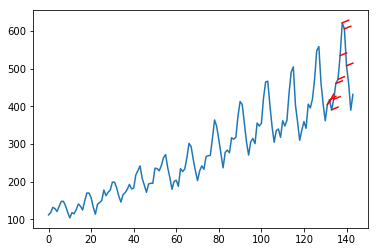

In [14]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from numpy import array

# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

# convert time series into supervised learning problem
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# transform series into train and test sets for supervised learning
def prepare_data(series, n_test, n_lag, n_seq):
	# extract raw values
	raw_values = series.values
	# transform data to be stationary
	diff_series = difference(raw_values, 1)
	diff_values = diff_series.values
	diff_values = diff_values.reshape(len(diff_values), 1)
	# rescale values to -1, 1
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaled_values = scaler.fit_transform(diff_values)
	scaled_values = scaled_values.reshape(len(scaled_values), 1)
	# transform into supervised learning problem X, y
	supervised = series_to_supervised(scaled_values, n_lag, n_seq)
	supervised_values = supervised.values
	# split into train and test sets
	train, test = supervised_values[0:-n_test], supervised_values[-n_test:]
	return scaler, train, test

# fit an LSTM network to training data
def fit_lstm(train, n_lag, n_seq, n_batch, nb_epoch, n_neurons):
	# reshape training into [samples, timesteps, features]
	X, y = train[:, 0:n_lag], train[:, n_lag:]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	# design network
	model = Sequential()
	model.add(LSTM(n_neurons, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(y.shape[1]))
	model.compile(loss='mean_squared_error', optimizer='adam')
	# fit network
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=n_batch, verbose=0, shuffle=False)
		model.reset_states()
	return model

# make one forecast with an LSTM,
def forecast_lstm(model, X, n_batch):
	# reshape input pattern to [samples, timesteps, features]
	X = X.reshape(1, 1, len(X))
	# make forecast
	forecast = model.predict(X, batch_size=n_batch)
	# convert to array
	return [x for x in forecast[0, :]]

# evaluate the persistence model
def make_forecasts(model, n_batch, train, test, n_lag, n_seq):
	forecasts = list()
	for i in range(len(test)):
		X, y = test[i, 0:n_lag], test[i, n_lag:]
		# make forecast
		forecast = forecast_lstm(model, X, n_batch)
		# store the forecast
		forecasts.append(forecast)
	return forecasts

# invert differenced forecast
def inverse_difference(last_ob, forecast):
	# invert first forecast
	inverted = list()
	inverted.append(forecast[0] + last_ob)
	# propagate difference forecast using inverted first value
	for i in range(1, len(forecast)):
		inverted.append(forecast[i] + inverted[i-1])
	return inverted

# inverse data transform on forecasts
def inverse_transform(series, forecasts, scaler, n_test):
	inverted = list()
	for i in range(len(forecasts)):
		# create array from forecast
		forecast = array(forecasts[i])
		forecast = forecast.reshape(1, len(forecast))
		# invert scaling
		inv_scale = scaler.inverse_transform(forecast)
		inv_scale = inv_scale[0, :]
		# invert differencing
		index = len(series) - n_test + i - 1
		last_ob = series.values[index]
		inv_diff = inverse_difference(last_ob, inv_scale)
		# store
		inverted.append(inv_diff)
	return inverted

# evaluate the RMSE for each forecast time step
def evaluate_forecasts(test, forecasts, n_lag, n_seq):
	for i in range(n_seq):
		actual = [row[i] for row in test]
		predicted = [forecast[i] for forecast in forecasts]
		rmse = sqrt(mean_squared_error(actual, predicted))
		print('t+%d RMSE: %f' % ((i+1), rmse))

# plot the forecasts in the context of the original dataset
def plot_forecasts(series, forecasts, n_test):
	# plot the entire dataset in blue
	pyplot.plot(series.values)
	# plot the forecasts in red
	for i in range(len(forecasts)):
		off_s = len(series) - n_test + i - 1
		off_e = off_s + len(forecasts[i]) + 1
		xaxis = [x for x in range(off_s, off_e)]
		yaxis = [series.values[off_s]] + forecasts[i]
		pyplot.plot(xaxis, yaxis, color='red')
	# show the plot
	pyplot.show()

# load dataset
series = read_csv('./data/passengers.csv', header=0, parse_dates=True, index_col=0, sep=';')
# configure
n_lag = 1
n_seq = 3
n_test = 10
n_epochs = 1500
n_batch = 1
n_neurons = 1
# prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test+2)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

            Sales
Month            
1901-01-01  266.0
1901-02-01  145.9
1901-03-01  183.1
1901-04-01  119.3
1901-05-01  180.3


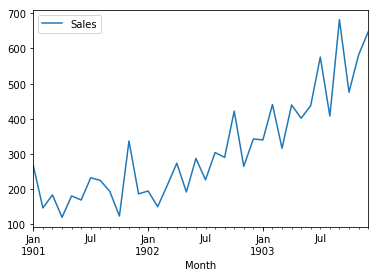

In [12]:
# load and plot dataset
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
# load dataset

series = read_csv('./data/shampoo-sales.csv', header=0, parse_dates=True, index_col=0, sep=';')
# summarize first few rows
print(series.head())
# line plot
series.plot()
pyplot.show()